# Erosion Simulation on Displacement Maps

In [1]:
import os
import importlib
import scipy.ndimage

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
from scipy import interpolate
from PIL import Image

import core.noise as noise
 
importlib.reload(noise);

## Some Basic Information for this Notebook

In [2]:
# Basic displacement map file, grayscale.
original_well = os.path.join("Erosion", "DisplacementeWell.png")

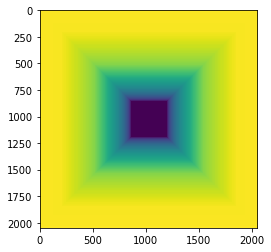

In [3]:
# Import the displacement map as numpy array.
img = Image.open(original_well)
img.load()
well_profile = np.asarray(img.convert('L'), dtype="int32")

# Determine the map size (pixel).
map_size = well_profile.shape

# Show the map.
plt.imshow(well_profile);

In [4]:
def point(range_x, range_y, border):
    """
    Take a random location within the domain of the map.
    Sampling ranges are cropped to have a border of valid 
    cells around the sampling area.
    """
    
    min_range_x = border
    max_range_x = range_x-border
    
    min_range_y = border
    max_range_y = range_y-border
    
    x = np.random.randint(min_range_x, max_range_x, 1).item()
    y = np.random.randint(min_range_y, max_range_y, 1).item()
    return x, y

# Precipitation - A Single Particle

Height value: 185


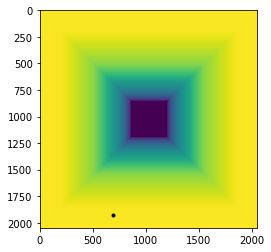

In [5]:
# Get random point.
x,y = point(map_size[0], map_size[1], 1)

# Show the location.
plt.imshow(well_profile)
plt.scatter(x,y, marker=".",
            color="k");

# Get height at point.
print("Height value: {}".format(well_profile[x][y]))

In [52]:
# Create a stencil to get the location of the cells around
# the randomly choosen location.

# 1 2 3
# 4 X 5
# 6 7 8

def stencil(x,y, scale=1):
    
    x_locs = list()
    y_locs = list()
    
    for y_loc in range(3):
        new_y = y + ((y_loc * scale) - scale)
#         y_locs.append(new_y)
        
        for x_loc in range(3):
            new_x = x + ((x_loc * scale) - scale)
            if new_x == x:
                if new_y == y:
                    continue
            x_locs.append(new_x)
            y_locs.append(new_y)
    
    return [x_locs, y_locs]

In [54]:
stencil_coords = stencil(x,y,2)
print(stencil_coords)
print(len(stencil_coords[0]))
print(x,y)

[[1983, 1985, 1987, 1983, 1987, 1983, 1985, 1987], [1760, 1760, 1760, 1762, 1762, 1764, 1764, 1764]]
8
1985 1762


Height value: 184
[182, 182, 182, 184, 184, 185, 185, 185]


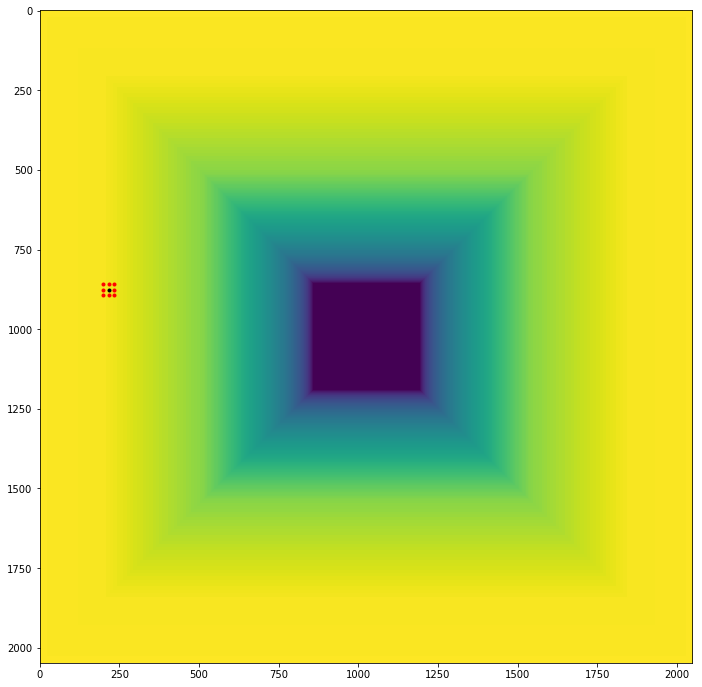

In [75]:
# Prevent picking values outside of the map.
border = 18

# Get random point.
x,y = point(map_size[0], map_size[1], border)

# Get stencil.
stencil_coords = stencil(x,y,border)

#
plt.figure(figsize=(12,12))

# Show the location.
plt.imshow(well_profile)
plt.scatter(stencil_coords[0],
            stencil_coords[1], marker=".",
            color="r")
plt.scatter(x,y, marker=".",
            color="k");

# Get height at point.
print("Height value: {}".format(well_profile[x][y]))

stencil_height = list()
for id_x, x_val in enumerate(stencil_coords[0]):
    stencil_height.append(well_profile[x_val][stencil_coords[1][id_x]])
#     print(well_profile[x_val][stencil_coords[1][id_x]])
print(sorted(stencil_height))